## Andrew NG Machine Learning Course - Exercise 1 - Linear Regression

### Linear Regression with one variable.

Here we load data from ex1data1.txt. This contains a dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city.

In [1]:
# Let's print out the first 5 lines to see what our data looks like!

with open("ex1/ex1data1.txt") as datafile:
    head = [next(datafile) for x in range(5)]
print(head)

['6.1101,17.592\n', '5.5277,9.1302\n', '8.5186,13.662\n', '7.0032,11.854\n', '5.8598,6.8233\n']


In [2]:
# Looks like a CSV. Let's load it into a data frame.

import pandas as pd 

df = pd.read_csv("ex1/ex1data1.txt", header = None) 
# Preview the first 5 lines of the loaded data 
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<Figure size 432x288 with 0 Axes>

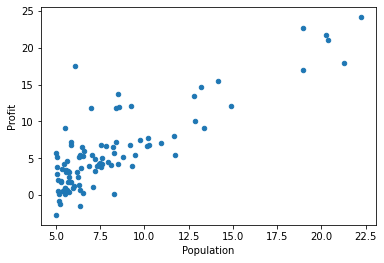

In [3]:
# Let's plot the data next.

import matplotlib.pyplot as plt
plt.figure(1) 
df.columns = ['Population','Profit']
df.plot(x ='Population', y='Profit', kind = 'scatter')
plt.show()

Looks like we have a linear relationship between Population and Profit. Let's fit a linear model using gradient descent. Obviously we could get a library to do this for us but we'll do it manually.

In [4]:
import numpy as np

m = df['Population'].count()
print("Number of rows/training examples are: ", m)

# Let's make our variable matrix X.
# We need to take the Population columnn from our data and add
# another dimension to accomodate the theta0 intercept term.

population = df['Population'].to_numpy()
intercept = np.ones((m))

X = np.hstack((intercept.reshape(-1,1),population.reshape(-1,1)))

print("First 5 rows of X are: ")
print(X[0:5,:])

Number of rows/training examples are:  97
First 5 rows of X are: 
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [5]:
# Create y
y = df['Profit'].to_numpy().reshape(-1,1)

print("First 5 rows of y are: ")
print(y[0:5,:])

# Initialiase theta as zero.
initial_theta = np.zeros((2,1))
print("Initial Theta is: ")
print(initial_theta)

First 5 rows of y are: 
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]
Initial Theta is: 
[[0.]
 [0.]]


In [6]:
# Define the cost function
def cost_function(X, theta, y):
    m = np.size(X,0)
    # X*theta - y
    delta = np.subtract(np.dot(X,theta),y)
    # 0.5 * m * (X*theta - y)' * (X*theta - y)
    return (1/(2*m))*(np.dot(delta.transpose(),delta))[0][0]
    

In [7]:
print("Expected cost: 32.07")
print("Actual cost: ", cost_function(X,initial_theta,y))

Expected cost: 32.07
Actual cost:  32.072733877455676


<Figure size 432x288 with 0 Axes>

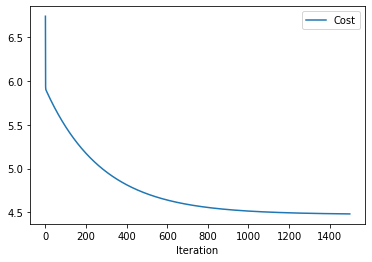

In [13]:
# Gradient Descent

iterations = 1500
alpha = 0.01

theta = initial_theta
iteration_num = []
J_history = []
for i in range(0, iterations):
    theta = theta - (alpha/m) * (np.dot(X.transpose(),(np.dot(X,theta)-y)))
    J_history.append(cost_function(X,theta,y))
    iteration_num.append(i)
    
# Plot cost over iterations.
J_df = pd.DataFrame(iteration_num, J_history)
J_df = pd.DataFrame(
    {'Iteration': iteration_num,
     'Cost': J_history
    })

J_df.head()

plt.figure(2) 
J_df.plot(x='Iteration', y='Cost', kind = 'line')
plt.show()


<Figure size 432x288 with 0 Axes>

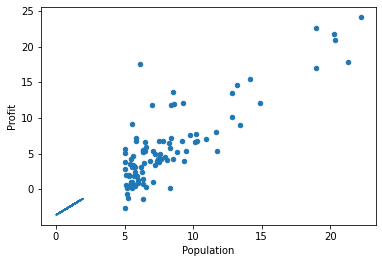

In [26]:
plt.figure(1)
df.plot(x ='Population', y='Profit', kind = 'scatter')
plt.plot(x, theta[1]*x + theta[0],'-')
plt.show()

In [ ]:
# TODO: Make the line biglier...

In [9]:
#TODO: do this using a library!